In [25]:
from bitcoin_graph2 import bitcoin_graph, bitcoin_network, bitcoin_data_export
import networkx as nx
from pickle import load

model_file = "RF_model.sav"
scaler_file = "scaler.pkl"
model_RF = load(open(model_file, 'rb'))
scaler = load(open(scaler_file, 'rb'))

# you can input a single wallet address or a list of dictionaries with metadata
node_data = [('1HvdRe79jANRQgSK82iFiFExXm2qnxSiqo', {'name': 'Inspected wallet addr'})]

# this will take a single wallet address of a list of dictionaries with metadata
edge_data = bitcoin_network(node_data, scaler, model_RF)



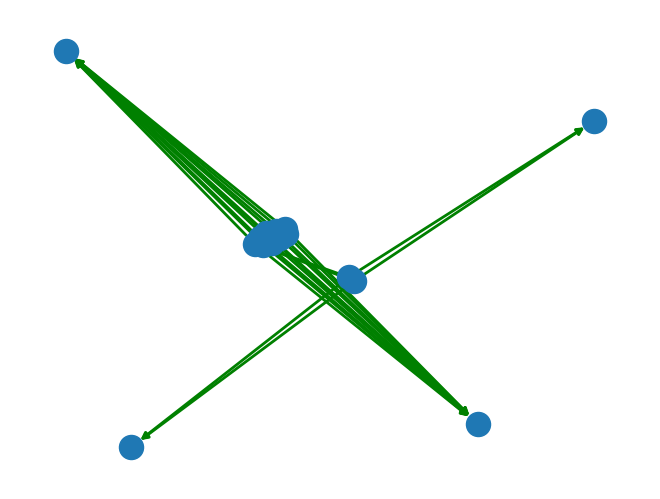

In [26]:
import matplotlib.pyplot as plt
# this will output a Networkx graph object
graph_object = nx.DiGraph()
graph_object.add_nodes_from(node_data)

for edge in edge_data:
    color = 'g'
    if (edge[2]['isLegal'] == False):
        color = 'r'
    graph_object.add_edge(edge[0], edge[1], color=color)

graph_object.add_edges_from(edge_data)

# nx.draw(graph_object, with_labels=False, font_weight='bold')

edges,colors = zip(*nx.get_edge_attributes(graph_object,'color').items())

nx.draw(graph_object,edgelist=edges,edge_color=colors,width=2)
plt.show()

# you can then export to one of several formats
# bitcoin_data_export(graph_object, 'graphml', 'filename')